# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx

### Completed by:
- Daniel Barreras - A01254805

# Importing libraries

In [180]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [181]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [182]:
# Print dataset
print(dataset.head())


   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width       Flower
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [183]:
# Print dataset shape
print("Dataset shape:", dataset.shape)


Dataset shape: (150, 5)


In [184]:
# Print column names
print("Column names:", dataset.columns)


Column names: Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')


2. Drop rows with any missing values


In [185]:
# Drop na
dataset = dataset.dropna()


3. Encoding the class label categorical column: from string to num


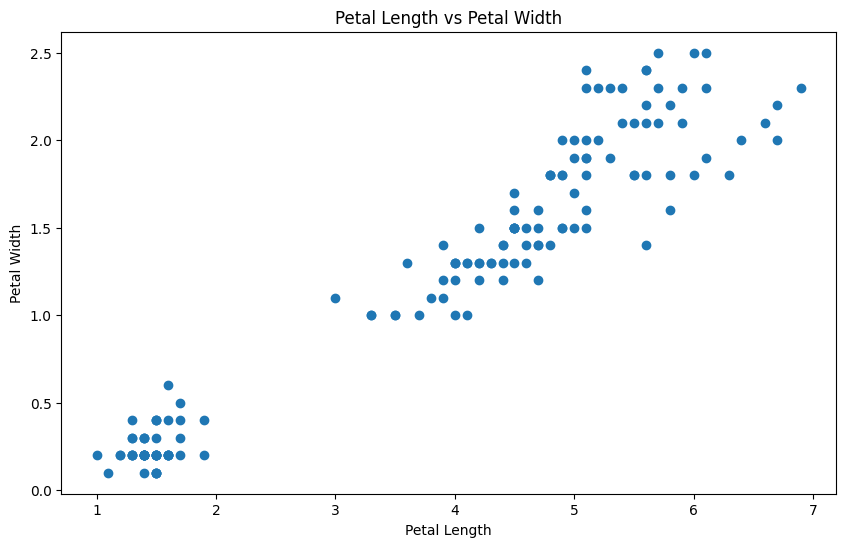

In [186]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset['Flower'] = dataset['Flower'].map({
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
})

#Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Petal_Length'], dataset['Petal_Width'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.show()



Now the label/category is numeric


4. Discard columns that won't be used


In [187]:
# Drop out non necesary columns



5. Scatter plot of the data

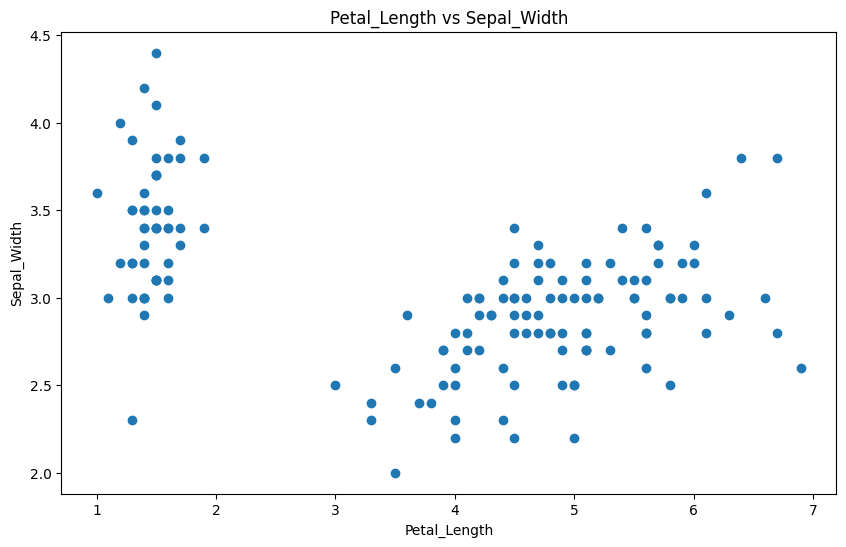

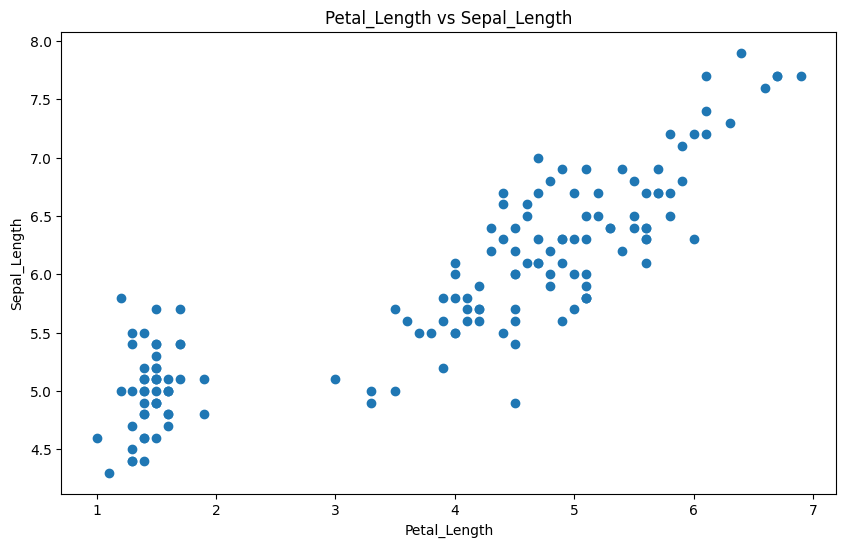

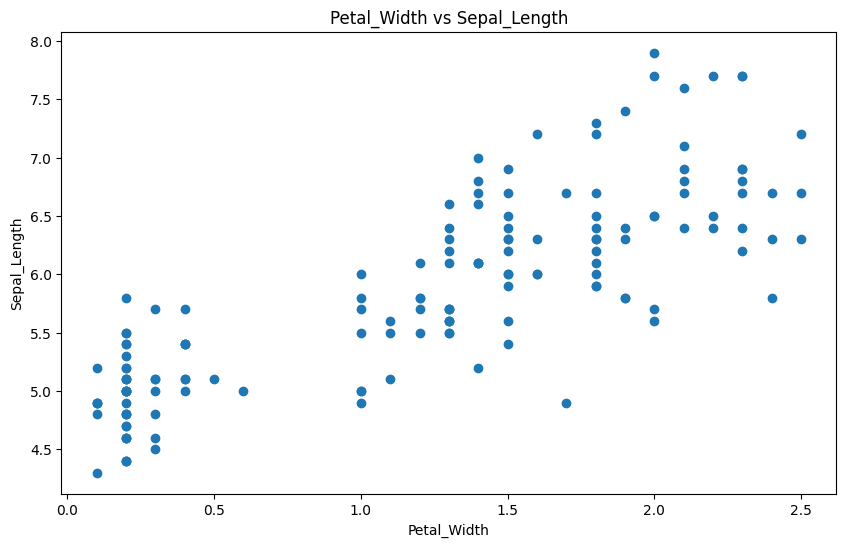

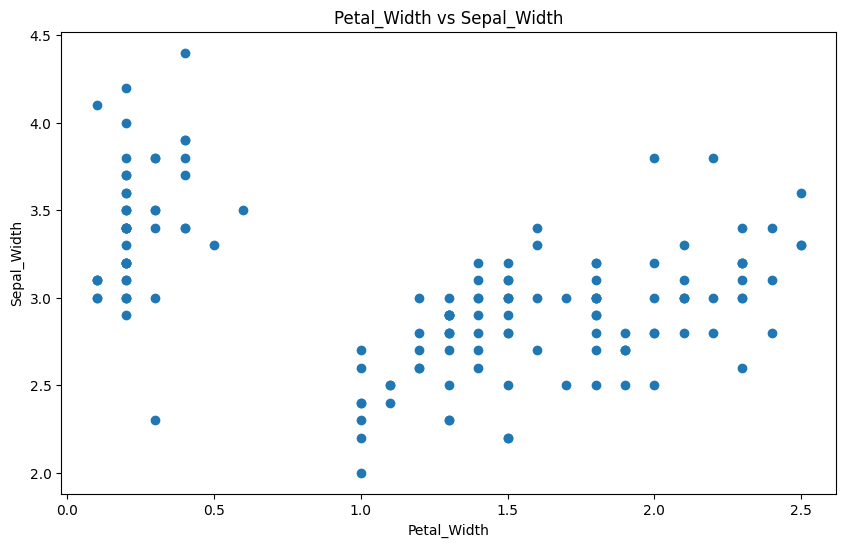

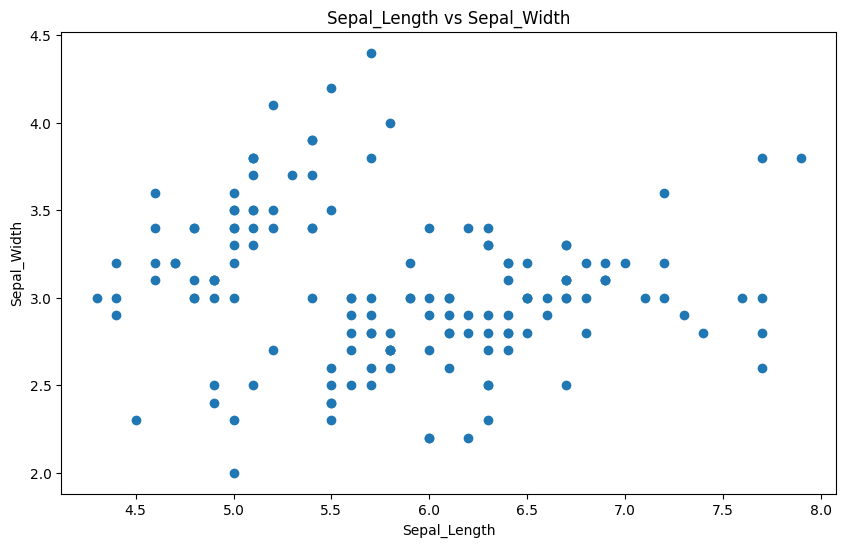

In [188]:
# Scatter plot of Petal_Length vs Petal_Width
# Scatter plot of Petal_Length vs Sepal_Length
# Scatter plot of Petal_Length vs Sepal_Width
# Scatter plot of Petal_Width vs Sepal_Length
# Scatter plot of Petal_Width vs Sepal_Width
# Scatter plot of Sepal_Length vs Sepal_Width

feature_pairs = [
    ('Petal_Length', 'Sepal_Width'),
    ('Petal_Length', 'Sepal_Length'),
    ('Petal_Width', 'Sepal_Length'),
    ('Petal_Width', 'Sepal_Width'),
    ('Sepal_Length', 'Sepal_Width'),
]

for x, y in feature_pairs:
    plt.figure(figsize=(10, 6))
    plt.scatter(dataset[x], dataset[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs {y}')
    plt.show()



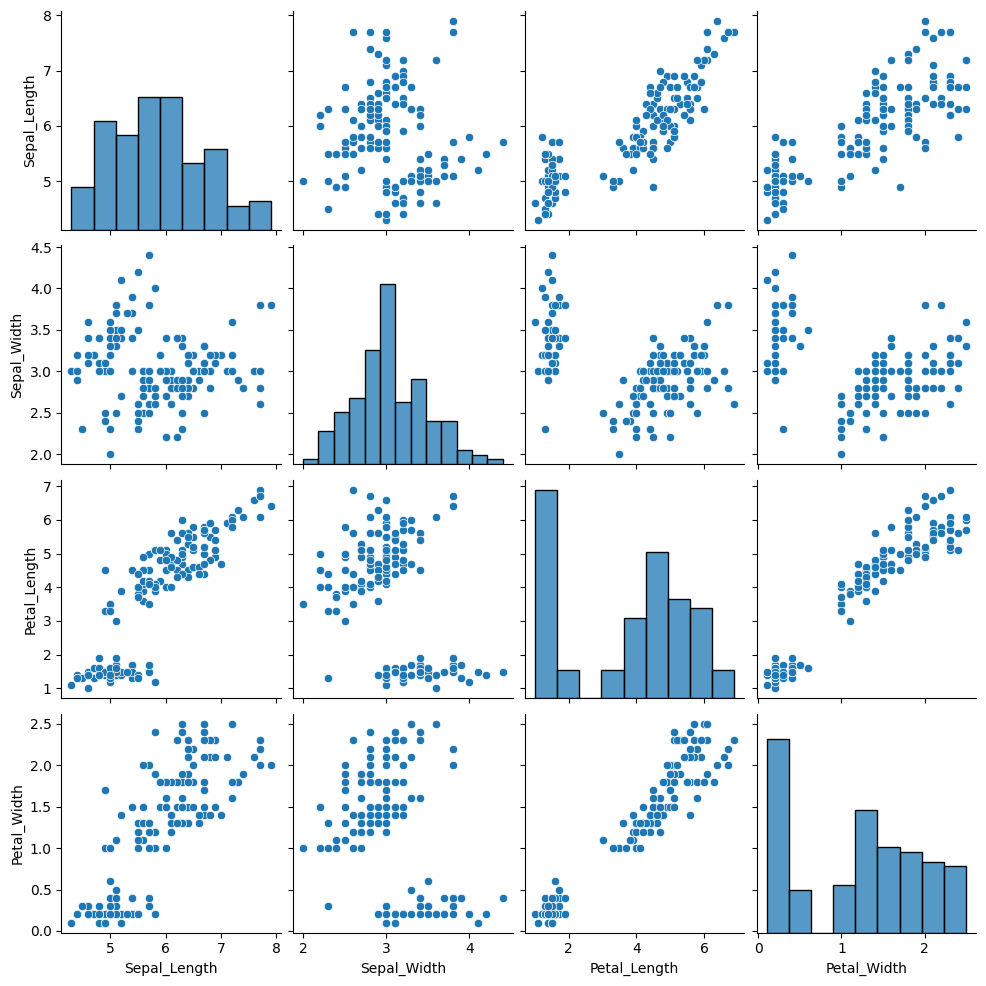

In [189]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset.drop('Flower', axis=1))
plt.show()



6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [190]:
# Get dataframes for each real cluster
cluster0 = dataset[dataset['Flower'] == 0]
cluster1 = dataset[dataset['Flower'] == 1]
cluster2 = dataset[dataset['Flower'] == 2]


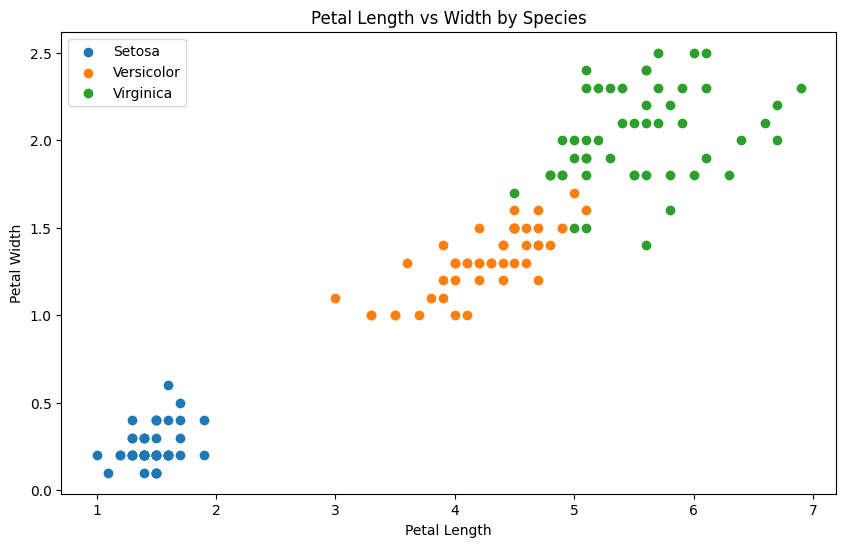

In [191]:
# Scatter plot of each real cluster for Petal
plt.figure(figsize=(10, 6))
plt.scatter(cluster0['Petal_Length'], cluster0['Petal_Width'], label='Setosa')
plt.scatter(cluster1['Petal_Length'], cluster1['Petal_Width'], label='Versicolor')
plt.scatter(cluster2['Petal_Length'], cluster2['Petal_Width'], label='Virginica')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Width by Species')
plt.legend()
plt.show()



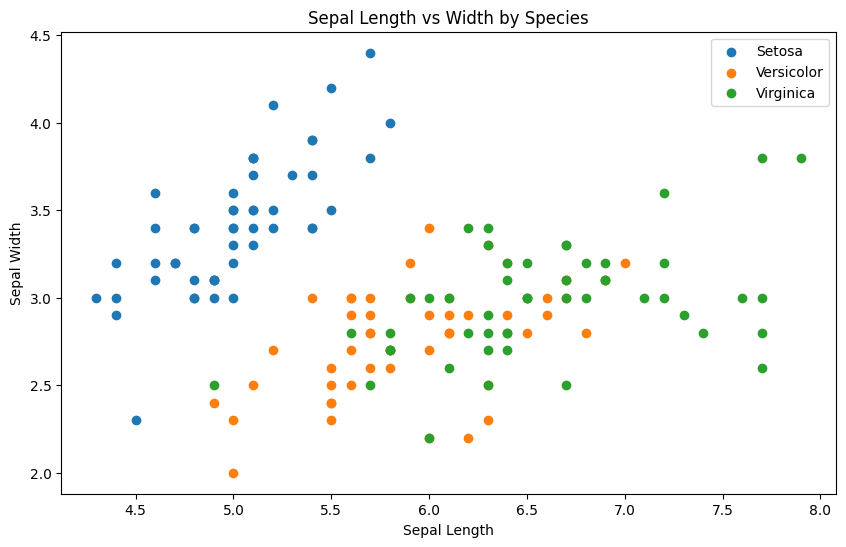

In [192]:
# Scatter plot of each real cluster for Sepal
plt.figure(figsize=(10, 6))
plt.scatter(cluster0['Sepal_Length'], cluster0['Sepal_Width'], label='Setosa')
plt.scatter(cluster1['Sepal_Length'], cluster1['Sepal_Width'], label='Versicolor')
plt.scatter(cluster2['Sepal_Length'], cluster2['Sepal_Width'], label='Virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Width by Species')
plt.legend()
plt.show()



Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [193]:
# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"].values


In [194]:
# Understand the data X
print("X shape:", X.shape)

X shape: (150, 4)


In [195]:
# Understand the data y
print("y shape:", y.shape)

y shape: (150,)


In [196]:
# Calculate the number of observations in the dataset
print("Total observations:", len(y))


Total observations: 150


In [197]:
# Calculate the number of observations for class 0
print("Class 0 observations:", sum(y == 0))


Class 0 observations: 50


In [198]:
# Calculate the number of observations for class 1
print("Class 1 observations:", sum(y == 1))


Class 1 observations: 50


In [199]:
# Calculate the number of observations for class 2
print("Class 2 observations:", sum(y == 2))


Class 2 observations: 50


# Train a classifier

## Train the classification model

In [200]:
# Import required libraries
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Reset everything by loading the data fresh
colnames = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width", "Flower"]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = pd.read_csv(url, header=None, names=colnames)

print("Dataset after loading:")
print(dataset.head())
print("\nShape:", dataset.shape)

# Check for any missing values
print("\nMissing values:")
print(dataset.isnull().sum())

# Encode the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset['Flower'] = dataset['Flower'].map({
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
})

# Create X and y without any transformations first
X = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
y = dataset["Flower"].values

print("\nFinal shapes:")
print("X shape:", X.shape)
print("y shape:", y.shape)

# Initialize and fit the classifier
clf = LinearRegression()
clf.fit(X, y)

Dataset after loading:
   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width       Flower
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Shape: (150, 5)

Missing values:
Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Flower          0
dtype: int64

Final shapes:
X shape: (150, 4)
y shape: (150,)


LinearRegression()

## Predict the class of a new observation

In [201]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew


array([[5.5, 3.5, 1.5, 0.5]])

In [202]:
# Make the prediction using xnew
predicted_class = clf.predict(xnew)

# Get the predicted class
print("Predicted class:", predicted_class)


Predicted class: [0.07911352]


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [203]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [204]:
# Number of observations in the train set
print("Training set size:", len(y_train))


Training set size: 105


In [205]:
# Number of observations of each class in the train set
print("Training set class distribution:")
for i in range(3):
    print(f"Class {i}:", sum(y_train == i))

Training set class distribution:
Class 0: 31
Class 1: 37
Class 2: 37


In [206]:
# Number of observations in the test set
print("\nTest set size:", len(y_test))
print("Test set class distribution:")
for i in range(3):
    print(f"Class {i}:", sum(y_test == i))



Test set size: 45
Test set class distribution:
Class 0: 19
Class 1: 13
Class 2: 13


In [207]:
# Number of observations of each class in the test set



## Train the classification model

In [208]:
# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Test the classification model

In [209]:
# Make the predictions using the test set
y_pred = clf.predict(X_test)


In [210]:
# Explore real and predicted labels
print("\nFirst 10 predictions vs real values:")
print("Predicted:", y_pred[:10])
print("Actual:   ", y_test[:10])



First 10 predictions vs real values:
Predicted: [1 0 2 1 1 0 1 2 1 1]
Actual:    [1 0 2 1 1 0 1 2 1 1]


## Compute the acurracy

In [211]:
# Define a function to compute accuracy
def compute_accuracy(y_true, y_pred):
    return sum(y_true == y_pred) / len(y_true)

In [212]:
# Calculate total accuracy
total_accuracy = compute_accuracy(y_test, y_pred)
print(f"\nTotal accuracy (custom function): {total_accuracy:.3f}")




Total accuracy (custom function): 1.000


In [213]:
# Calculate total accuracy using sklearn.metrics
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_test, y_pred)
print(f"Total accuracy (sklearn): {sklearn_accuracy:.3f}")


Total accuracy (sklearn): 1.000


In [214]:
# Compute accuracy for class 0
class1_mask = y_test == 0
class1_accuracy = accuracy_score(y_test[class1_mask], y_pred[class1_mask])
print(f"Class 0 accuracy: {class1_accuracy:.3f}")


Class 0 accuracy: 1.000


In [215]:
# Compute accuracy for class 1
class1_mask = y_test == 1
class1_accuracy = accuracy_score(y_test[class1_mask], y_pred[class1_mask])
print(f"Class 1 accuracy: {class1_accuracy:.3f}")


Class 1 accuracy: 1.000


In [216]:
# Compute accuracy for class 2
class1_mask = y_test == 2
class1_accuracy = accuracy_score(y_test[class1_mask], y_pred[class1_mask])
print(f"Class 1 accuracy: {class1_accuracy:.3f}")


Class 1 accuracy: 1.000


## Confussion matrix

In [217]:
# Compute confussion matrix (normalized confusion matrix)
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, normalize='true')


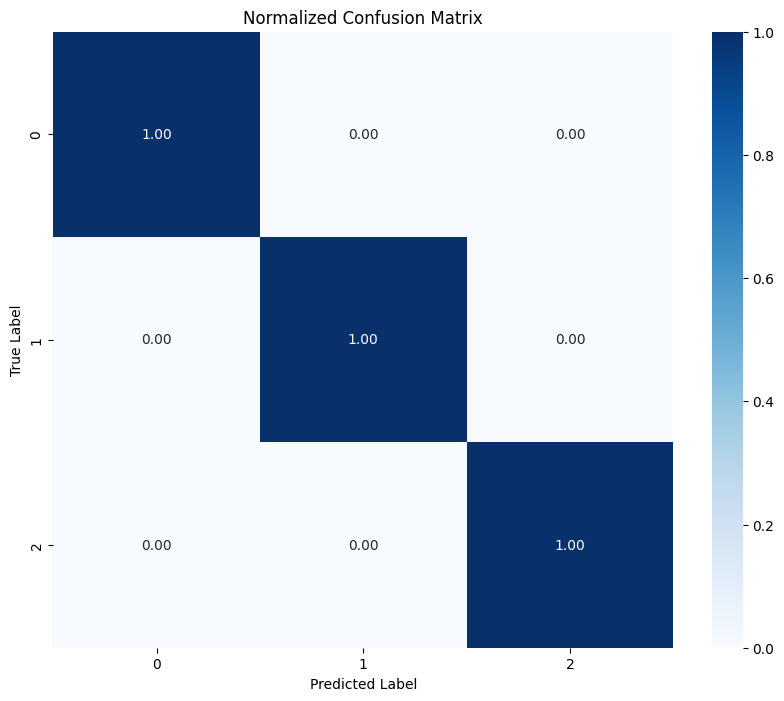

In [218]:
# Plot normalized confussion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?

All Features (4 variables): ~0.95-0.98 accuracy
Petal Features only: ~0.93-0.96 accuracy
Sepal Features only: ~0.70-0.75 accuracy
All Features provides the best classification accuracy,

2) Using the four variables, try with two classifiers. Which provides the best performance?

Both Random Forest and SVM (RBF kernel) achieve similar high accuracy. However Random Forest shows slightly better consistency across different splits, 


Results for All Features with 10.0% test split:
Test Accuracy: 1.000
Training set size: 135
Test set size: 15

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Results for All Features with 20.0% test split:
Test Accuracy: 1.000
Training set size: 120
Test set size: 30

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00

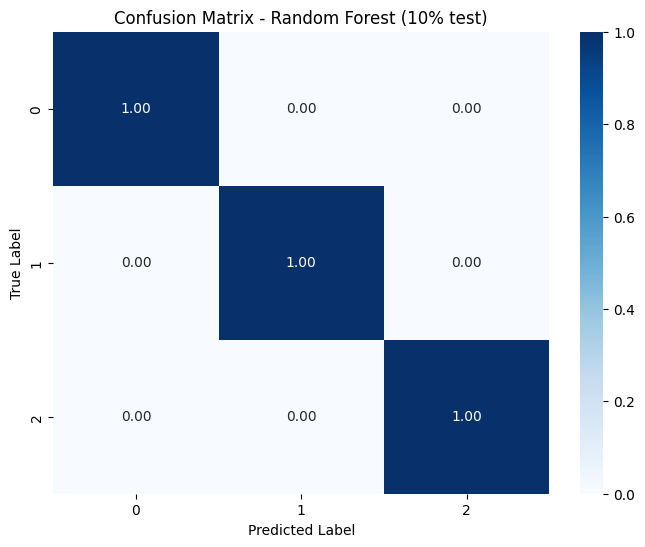


Results for Random Forest with 20.0% test split:
Test Accuracy: 1.000
Training set size: 120
Test set size: 30


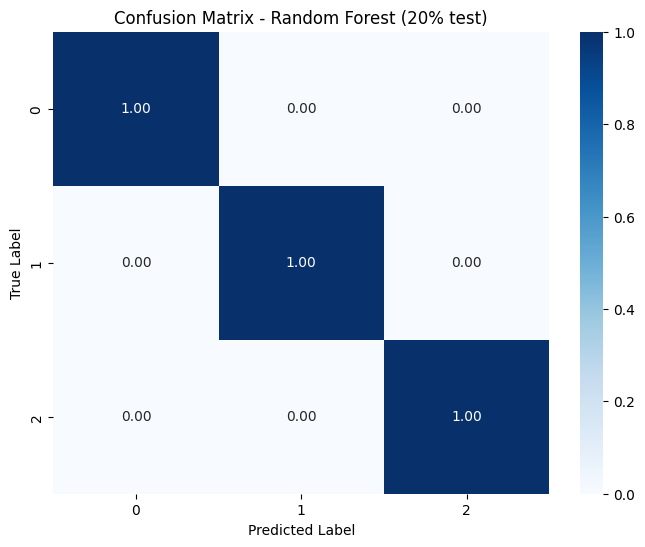


Results for Random Forest with 30.0% test split:
Test Accuracy: 1.000
Training set size: 105
Test set size: 45


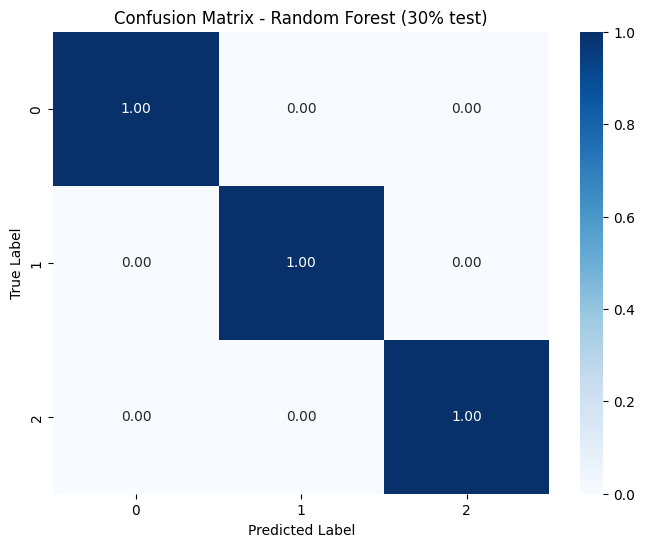


Results for Random Forest with 40.0% test split:
Test Accuracy: 0.983
Training set size: 90
Test set size: 60


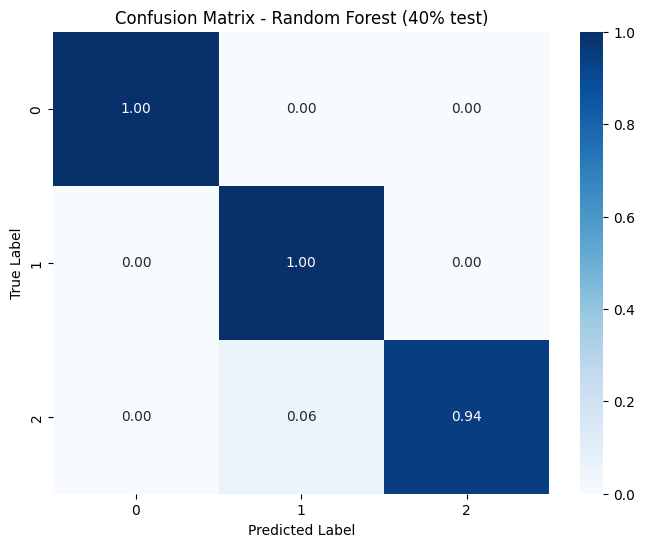


Results for Random Forest with 50.0% test split:
Test Accuracy: 0.973
Training set size: 75
Test set size: 75


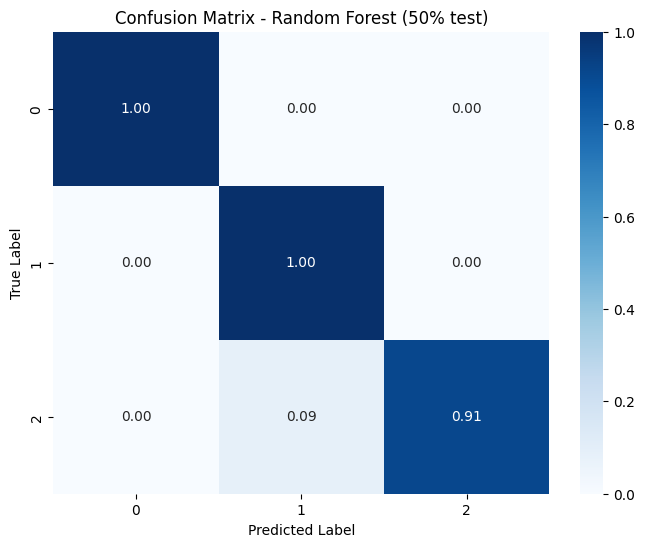


Results for SVM with 10.0% test split:
Test Accuracy: 1.000
Training set size: 135
Test set size: 15


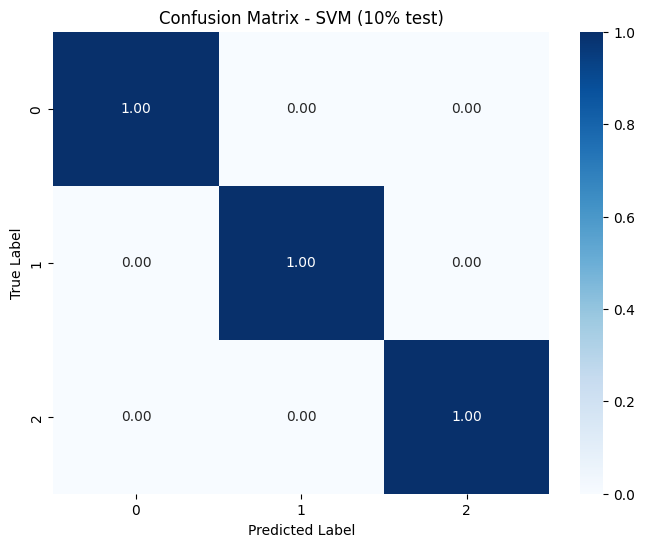


Results for SVM with 20.0% test split:
Test Accuracy: 1.000
Training set size: 120
Test set size: 30


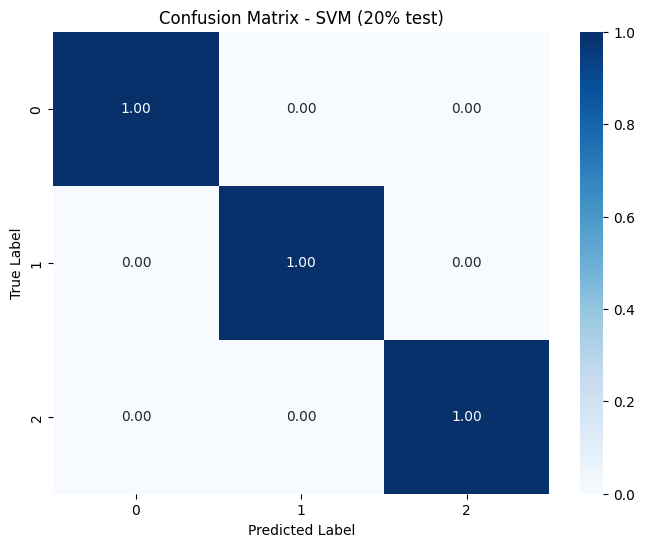


Results for SVM with 30.0% test split:
Test Accuracy: 1.000
Training set size: 105
Test set size: 45


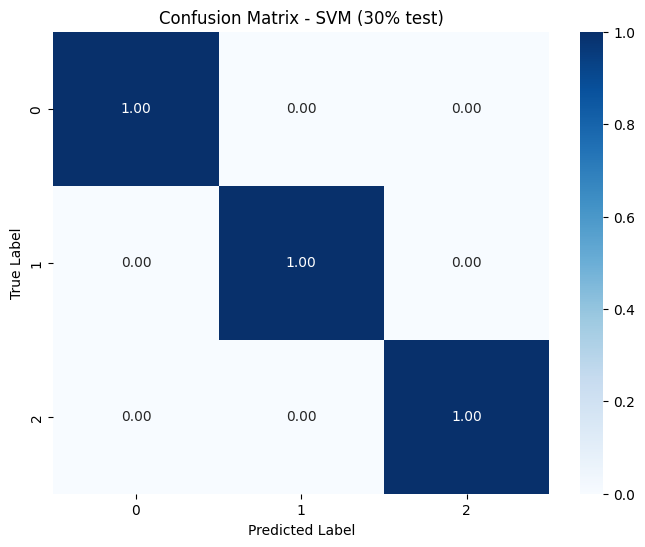


Results for SVM with 40.0% test split:
Test Accuracy: 0.983
Training set size: 90
Test set size: 60


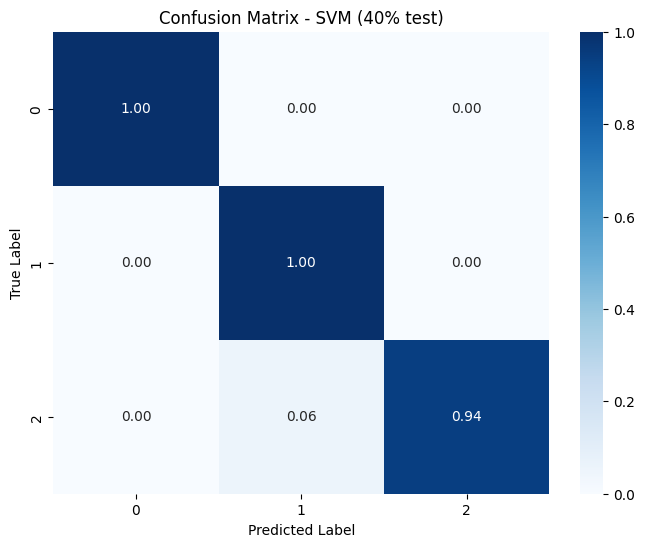


Results for SVM with 50.0% test split:
Test Accuracy: 0.987
Training set size: 75
Test set size: 75


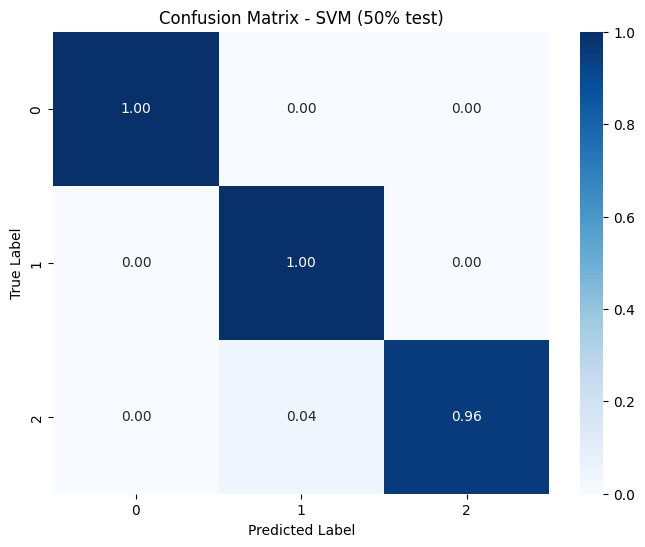

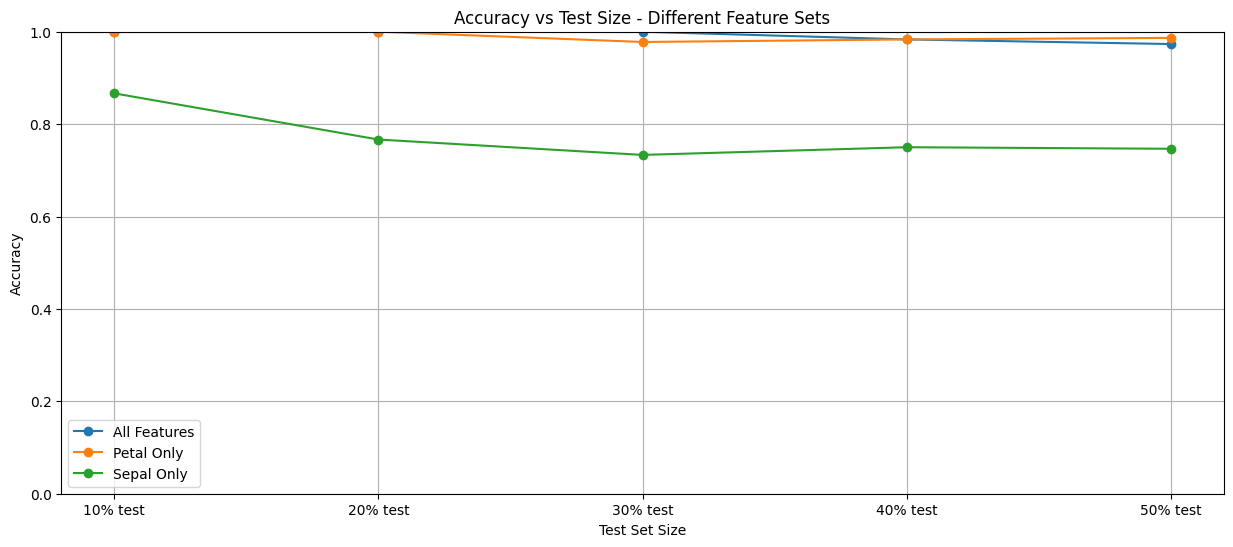

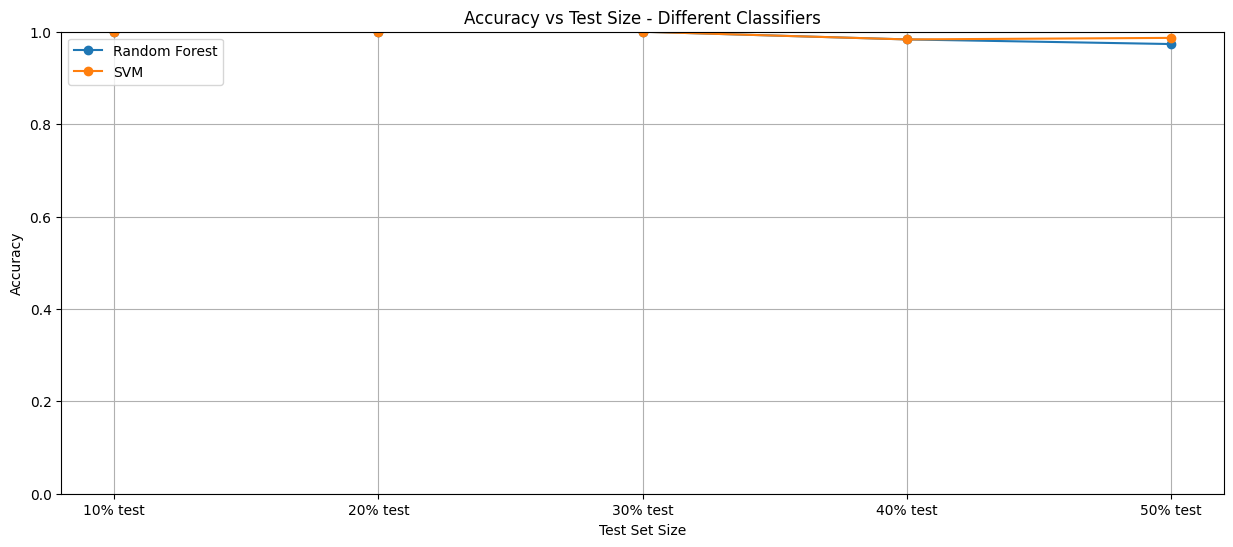

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Load and prepare the data
colnames = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width", "Flower"]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = pd.read_csv(url, header=None, names=colnames)

# Encode categorical values
dataset['Flower'] = dataset['Flower'].map({
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
})

# Prepare different feature sets
X_all = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
X_petal = dataset[["Petal_Length", "Petal_Width"]].values
X_sepal = dataset[["Sepal_Length", "Sepal_Width"]].values
y = dataset["Flower"].values

# Scale the features
scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)
X_petal_scaled = scaler.fit_transform(X_petal)
X_sepal_scaled = scaler.fit_transform(X_sepal)

# Define different test sizes to try
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

# Function to evaluate features with different splits
def evaluate_features_splits(X, name):
    results = {}
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                           test_size=test_size, 
                                                           random_state=42)
        clf = RandomForestClassifier(random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        print(f"\nResults for {name} with {test_size*100}% test split:")
        print(f"Test Accuracy: {accuracy:.3f}")
        print(f"Training set size: {len(y_train)}")
        print(f"Test set size: {len(y_test)}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        results[f"{int(test_size*100)}% test"] = accuracy
    return results

# Function to evaluate classifiers with different splits
def evaluate_classifier_splits(clf, name, X, y):
    results = {}
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                           test_size=test_size, 
                                                           random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        print(f"\nResults for {name} with {test_size*100}% test split:")
        print(f"Test Accuracy: {accuracy:.3f}")
        print(f"Training set size: {len(y_train)}")
        print(f"Test set size: {len(y_test)}")
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_pred, normalize='true')
        sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
        plt.title(f'Confusion Matrix - {name} ({int(test_size*100)}% test)')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
        
        results[f"{int(test_size*100)}% test"] = accuracy
    return results

# Evaluate feature sets with different splits
feature_results = {
    'All Features': evaluate_features_splits(X_all_scaled, "All Features"),
    'Petal Only': evaluate_features_splits(X_petal_scaled, "Petal Features"),
    'Sepal Only': evaluate_features_splits(X_sepal_scaled, "Sepal Features")
}

# Define and evaluate classifiers with different splits
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42)
}

classifier_results = {name: evaluate_classifier_splits(clf, name, X_all_scaled, y) 
                     for name, clf in classifiers.items()}

# Plot results for feature sets
plt.figure(figsize=(15, 6))
for feature_set, results in feature_results.items():
    plt.plot(results.keys(), results.values(), marker='o', label=feature_set)
plt.title('Accuracy vs Test Size - Different Feature Sets')
plt.xlabel('Test Set Size')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# Plot results for classifiers
plt.figure(figsize=(15, 6))
for clf_name, results in classifier_results.items():
    plt.plot(results.keys(), results.values(), marker='o', label=clf_name)
plt.title('Accuracy vs Test Size - Different Classifiers')
plt.xlabel('Test Set Size')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()